In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Данные константы
k = np.float64(0.011)
c = np.float64(1.6)
alpha = np.float64(0.5)
l = np.float64(0.5) # длина цилиндра
radius = np.float64(4) # радиус
beta = np.float64(0.008)
t = np.float64(1) # время наблюдения

In [39]:
# Задаем число отсчетов и шаги
num_m = 1000
num_i = 1000
tau = t/num_m # шаг по времени
h = radius/num_i # шаг по координате r
w = np.zeros((num_i, num_m),dtype=np.float64)

def intensive(i): #зависимость
    assert i<num_i, "функция intensive(r) определена только для r>radius"
#     r = i/num_i*radius
#     if r == 0:
#         return 100
#     else:
#         return 1/r
    return np.float64(1e-26)

In [40]:
# краевое условие
w[:,0] = 0 # при t = 0

In [41]:
for m in range(0,num_m-1): # идем послойно по m
    w[0,m+1] = w[0,m] + tau/c*(4*k/h**2*(w[0,m]-w[1,m])-2*alpha/l*w[0,m]+beta/l*intensive(0))
    for i in range(1, num_i-2): # считаем каждый из i-ых элементов на слое m
        w[i,m+1] = w[i,m] + tau/c*(k/2/i/h**2*(w[i-1,m]-w[i+1,m])+
                                   k/h**2*(w[i-1,m]-2*w[i,m]-w[i+1,m])-2*alpha/l*w[i,m]+beta/l*intensive(i))
    w[num_i-1,m+1] = w[num_i-1,m] + tau/c*(2*k/h**2*(w[num_i-2,m]-w[num_i-1,m])
                                           -2*alpha/l*w[num_i-1,m]+beta/l*intensive(num_i-1))
    

/home/kulinar/dlcourse_ai/.venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/home/kulinar/dlcourse_ai/.venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [42]:
w[0]

array([0.00000000e+000, 1.00000000e-031, 1.99875000e-031, 4.47330234e-031,
       1.02125056e-030, 2.29516908e-030, 5.11469656e-030, 1.13793859e-029,
       2.53133635e-029, 5.62947320e-029, 1.25165577e-028, 2.78266432e-028,
       6.18623777e-028, 1.37527192e-027, 3.05736701e-027, 6.79680671e-027,
       1.51099030e-026, 3.35906376e-026, 7.46749122e-026, 1.66008809e-025,
       3.69051965e-025, 8.20434471e-025, 1.82389685e-024, 4.05468056e-024,
       9.01390580e-024, 2.00386927e-023, 4.45477481e-023, 9.90334993e-023,
       2.20160040e-022, 4.89434821e-022, 1.08805597e-021, 2.41884257e-021,
       5.37729638e-021, 1.19541952e-020, 2.65752105e-020, 5.90789929e-020,
       1.31337714e-019, 2.91975105e-019, 6.49085926e-019, 1.44297419e-018,
       3.20785650e-018, 7.13134262e-018, 1.58535918e-017, 3.52439066e-017,
       7.83502545e-017, 1.74179396e-016, 3.87215872e-016, 8.60814395e-016,
       1.91366490e-015, 4.25424268e-015, 9.45754966e-015, 2.10249514e-014,
       4.67402865e-014, 1

In [43]:
w.dtype

dtype('float64')

In [44]:
w[:,100]

array([2.10667296e+03, 6.06002885e+02, 1.47520151e+02, 3.36996360e+01,
       7.44429043e+00, 1.61067439e+00, 3.43610327e-01, 7.25587846e-02,
       1.52038957e-02, 3.16655822e-03, 6.56298810e-04, 1.35479644e-04,
       2.78733530e-05, 5.71830273e-06, 1.17025774e-06, 2.38985668e-07,
       4.87137882e-08, 9.91324001e-09, 2.01438057e-09, 4.08785883e-10,
       8.28581385e-11, 1.67767509e-11, 3.39356278e-12, 6.85828931e-13,
       1.38490381e-13, 2.79444470e-14, 5.63467041e-15, 1.13543124e-15,
       2.28661134e-16, 4.60236330e-17, 9.25854062e-18, 1.86162324e-18,
       3.74146629e-19, 7.51630949e-20, 1.50935423e-20, 3.02978220e-21,
       6.07959330e-22, 1.21952011e-22, 2.44547091e-23, 4.90232746e-24,
       9.82460475e-25, 1.96837166e-25, 3.94261840e-26, 7.89508132e-27,
       1.58068012e-27, 3.16470430e-28, 6.34213838e-29, 1.27814253e-29,
       2.64956586e-30, 6.22835335e-31, 2.17497137e-31, 1.36446368e-31,
       1.20242524e-31, 1.17003582e-31, 1.16356267e-31, 1.16226919e-31,
      

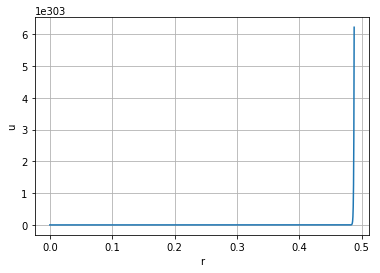

In [47]:
x = np.linspace(0,l, num_i)
#plt.ylim((-1.1, 0.5))
plt.plot(x, w[5,:])
plt.ylabel('u')
plt.xlabel('r')
plt.grid(True) 
plt.show()

In [ ]:
import matplotlib.cm as cmap
plt.imshow(w, cmap=cmap.hot)
plt.colorbar()
plt.show()